# Naive implementation of statevector simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Gate Definitions
X = np.array([[0, 1], [1, 0]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
I = np.eye(2)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

In [3]:
import pennylane as qml
import pennylane.numpy as np

#### Quantum Circuit simulation using Pennylane

In [7]:
def apply_quantum(qubits):
    dev = qml.device("lightning.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit(qubits):
        for wire in range(qubits):
            qml.QubitUnitary(X, wires=wire)
            qml.QubitUnitary(H, wires=wire)
        for wire in range(qubits-1):
            qml.QubitUnitary(CNOT, wires=[wire,wire+1])
        return qml.state()
    
    #print(qml.draw(circuit)(qubits))
    state = circuit(qubits)
    return state

Examples

In [5]:
# Run Circuit with Matrix Multiplication
state1 = apply_quantum(4)
state1

0: ──U(M0)──U(M1)─╭U(M2)───────────────┤  State
1: ──U(M0)──U(M1)─╰U(M2)─╭U(M2)────────┤  State
2: ──U(M0)──U(M1)────────╰U(M2)─╭U(M2)─┤  State
3: ──U(M0)──U(M1)───────────────╰U(M2)─┤  State

M0 = 
[[0 1]
 [1 0]]
M1 = 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
M2 = 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


array([ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,
        0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,
        0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])

M0 = $\sigma_X$ , M1 = Hadamard, M2 = CNOT

In [6]:
state2 = apply_quantum(5)
state2

0: ──U(M0)──U(M1)─╭U(M2)──────────────────────┤  State
1: ──U(M0)──U(M1)─╰U(M2)─╭U(M2)───────────────┤  State
2: ──U(M0)──U(M1)────────╰U(M2)─╭U(M2)────────┤  State
3: ──U(M0)──U(M1)───────────────╰U(M2)─╭U(M2)─┤  State
4: ──U(M0)──U(M1)──────────────────────╰U(M2)─┤  State

M0 = 
[[0 1]
 [1 0]]
M1 = 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
M2 = 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


array([ 0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
        0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
        0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
        0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
        0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
        0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
        0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
        0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j])

### Runtime plot

In [8]:
# Runtime Plot
qubits = range(1, 25)
times = []
states = []
for n in qubits:
    start = time.time()
    states.append(apply_quantum(n))
    times.append(time.time() - start)

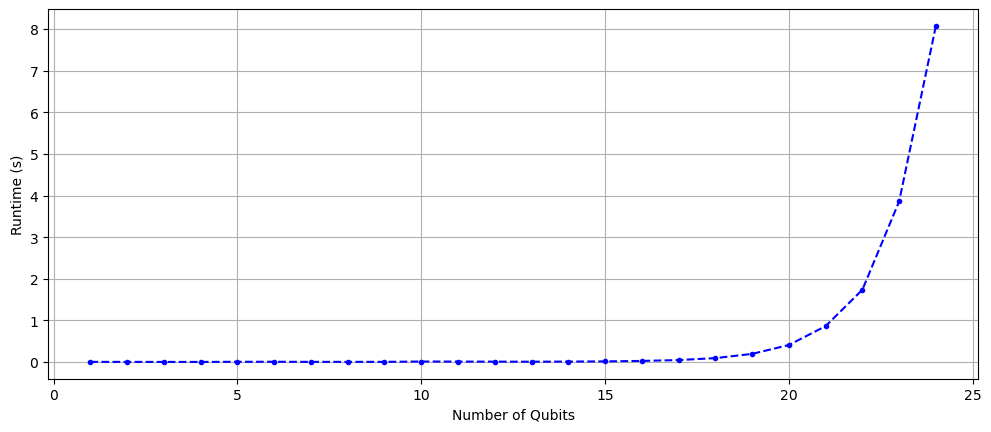

In [9]:
plt.style.use("seaborn-v0_8-dark-palette")
plt.figure().set_figwidth(12)
plt.grid()
plt.plot(qubits, times,marker = ".",ls = "--",c="b")
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.show()

# Task 1 : Subtask 1

### Using only matrix multiplication

In this section we are using qiskit for obtaining the n qubit matrices for subsequent application of CNOT gates. Without this functionality in the statevector representation it is very hard to obtain the matrix representations for subsequent CNOT application for $n$-qubit statevectors of size $2^{n}$. We use an appropriate sized matrix for another implementation wihout using qiskit in latter sections which will give us a fair idea of growth rate of computational load as a function of increasing number of qubits but it will compromise the accuracy of the states after the application of CNOT. The qiskit based implementation gives accurate statevectors on the other hand which is the primary motivation of presenting this section below.

In [36]:
# so we already have our operators, now we will calculate time required for computation.
def init_state(qubits):
    state = [1+0j,0]
    for _ in range(qubits-1):
        state = np.kron(state,[1,0])
    return state

In [37]:
print(len(init_state(4)))
init_state(4)

16


tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

In [67]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Operator

# function to calculate the cnot cascaded cnot operator for multiple qubits
def cnot_op(qubits):
    c = QuantumCircuit(qubits)
    for i in range(qubits-1):
        c.cx(i+1,i)
    print(c)
    matrix = Operator.from_circuit(c)
    return np.transpose(matrix.data)

In [68]:
print("sample: cnot operator for 2 qubits")
cnot_op(2)

sample: cnot operator for 2 qubits
     ┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──
          


tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]], requires_grad=True)

In [69]:
cnot_op(4)

     ┌───┐          
q_0: ┤ X ├──────────
     └─┬─┘┌───┐     
q_1: ──■──┤ X ├─────
          └─┬─┘┌───┐
q_2: ───────■──┤ X ├
               └─┬─┘
q_3: ────────────■──
                    


tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
         0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0

In [70]:
cnot_op(4).shape[0]

     ┌───┐          
q_0: ┤ X ├──────────
     └─┬─┘┌───┐     
q_1: ──■──┤ X ├─────
          └─┬─┘┌───┐
q_2: ───────■──┤ X ├
               └─┬─┘
q_3: ────────────■──
                    


16

In [71]:
def apply_numpy(qubits):
    initial_state = init_state(qubits)
    xop= 1
    hop= 1
    cnotop = cnot_op(qubits)
    state_vec = initial_state
    for _ in range(qubits):
        xop = np.kron(xop,X)
        hop = np.kron(hop,H)
    
    state_vec = np.dot(np.dot(hop,xop),state_vec)
    state_vec = np.dot(cnotop,state_vec)
    return state_vec

In [72]:
# Run Circuit with Matrix Multiplication
state2 = apply_numpy(4)
state2

     ┌───┐          
q_0: ┤ X ├──────────
     └─┬─┘┌───┐     
q_1: ──■──┤ X ├─────
          └─┬─┘┌───┐
q_2: ───────■──┤ X ├
               └─┬─┘
q_3: ────────────■──
                    


tensor([ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,
         0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,
         0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j], requires_grad=True)

In [34]:
# Runtime Plot
qubits = range(1, 12)
times_with_qiskit = []
states_with_qiskit = []
for n in qubits:
    start = time.time()
    states_with_qiskit.append(apply_numpy(n))
    times_with_qiskit.append(time.time() - start)

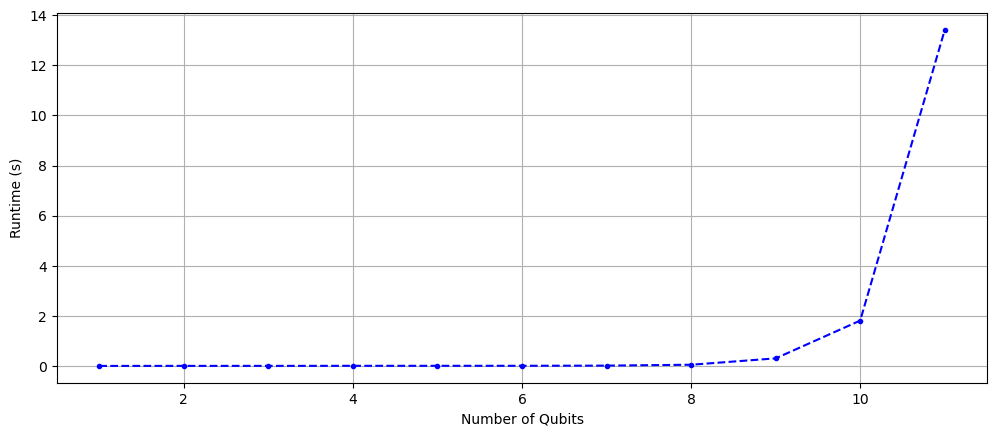

In [35]:
plt.style.use("seaborn-v0_8-dark-palette")
plt.figure().set_figwidth(12)
plt.grid()
plt.plot(qubits, times_with_qiskit,marker = ".",ls = "--",c="b")
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.show()

The simulation is run for max 12 qubits because classical matrix algrbra using the naive method beyond that limit becomes increasingly difficult.

## Without using the qiskit functionality for cnot gate

In [39]:
np.shape(CNOT)[0]

4

We define a **DIRECT SUM** function.\
Direct sum function which would give the matrix direct sum $c = a \oplus b$ for operator calculation for multi qubit states which is equal to 
$c = \begin{bmatrix} a & 0\\ 0 & b \end{bmatrix}$

Thuis function will help us get an appropriate sized matrix for our statevectors.

In [40]:
def direct_sum(a, b):
    m1, n1 = np.shape(a)
    m2, n2 = np.shape(b)
    c = np.zeros((m1 + m2, n1 + n2))
    
    c[:m1, :n1] = a   
    c[m1:, n1:] = b
    return c

In [41]:
direct_sum(np.ones((2,2)),[[9,9],[9,9]])

tensor([[1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [0., 0., 9., 9.],
        [0., 0., 9., 9.]], requires_grad=True)

#### Numpy implementation without using qiskit for CNOT gate

In [42]:
def apply_numpy_without_qiskit(qubits):
    initial_state = init_state(qubits)
    xop = 1
    hop = 1
    cnotop = 1
    state_vec = initial_state
    
    for _ in range(qubits):
        xop = np.kron(xop,X)
        hop = np.kron(hop,H)
    for _ in range(qubits//2):
        cnotop = np.kron(cnotop,CNOT)
    
    if not qubits%2==0 and qubits > 1:
        dims = np.shape(cnotop)[0]
        cnotop = direct_sum(np.eye(dims),cnotop)
    
    state_vec = np.dot(np.dot(hop,xop),state_vec)
    state_vec = np.dot(cnotop,state_vec)
    #print(cnotop)
    return state_vec

In [43]:
# Run Circuit with Matrix Multiplication
state2 = apply_numpy_without_qiskit(4)
state2

tensor([ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j,
        -0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,
        -0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j], requires_grad=True)

In [44]:
# Run Circuit with Matrix Multiplication
state3 = apply_numpy_without_qiskit(3)
state3

tensor([ 0.35355339+0.j, -0.35355339+0.j, -0.35355339+0.j,
         0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j,
        -0.35355339+0.j,  0.35355339+0.j], requires_grad=True)

In [45]:
# Runtime Plot
qubits = range(1, 12)
times_without_qiskit = []
states_without_qiskit = []
for n in qubits:
    start = time.time()
    states_without_qiskit.append(apply_numpy_without_qiskit(n))
    times_without_qiskit.append(time.time() - start)

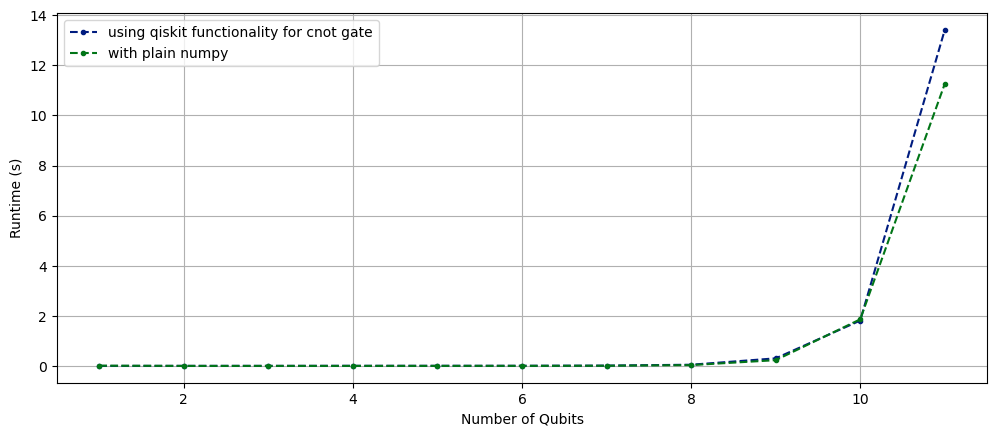

In [46]:
plt.style.use("seaborn-v0_8-dark-palette")
plt.figure().set_figwidth(12)
plt.grid()
plt.plot(qubits, times_with_qiskit,marker = ".",ls = "--",label = "using qiskit functionality for cnot gate")
plt.plot(qubits, times_without_qiskit,marker = ".",ls = "--",label = "with plain numpy")
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

#### A closer look at where the main diversion occurs

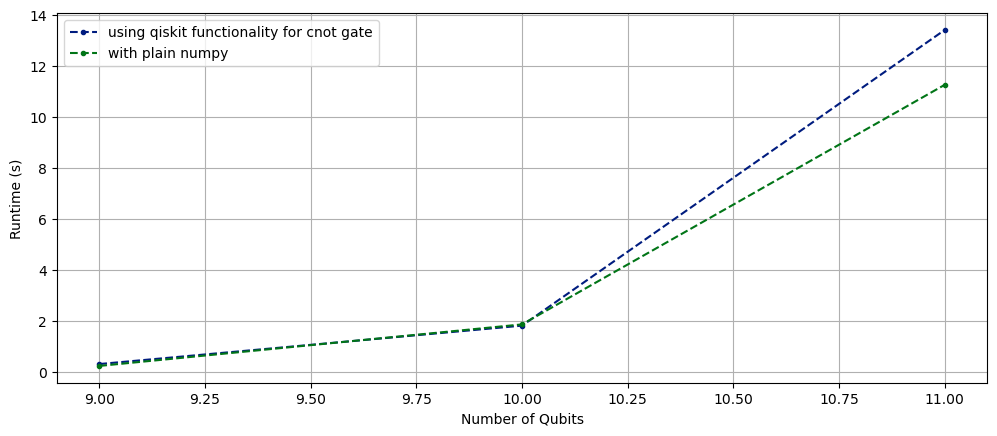

In [47]:
plt.style.use("seaborn-v0_8-dark-palette")
plt.figure().set_figwidth(12)
plt.grid()
plt.plot(qubits[8:], times_with_qiskit[8:],marker = ".",ls = "--",label = "using qiskit functionality for cnot gate")
plt.plot(qubits[8:], times_without_qiskit[8:],marker = ".",ls = "--",label = "with plain numpy")
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

As expected the additional usage of qiskit to extract the CNOT gate takes slightly more time, although only for basic linear algebraic calculations still as is shown the time adds up.

# Testing the states

In [75]:
test_1 = apply_quantum(4)

0: ──U(M0)──U(M1)─╭U(M2)───────────────┤  State
1: ──U(M0)──U(M1)─╰U(M2)─╭U(M2)────────┤  State
2: ──U(M0)──U(M1)────────╰U(M2)─╭U(M2)─┤  State
3: ──U(M0)──U(M1)───────────────╰U(M2)─┤  State

M0 = 
[[0 1]
 [1 0]]
M1 = 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
M2 = 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [76]:
test_2 = apply_numpy(4)

     ┌───┐          
q_0: ┤ X ├──────────
     └─┬─┘┌───┐     
q_1: ──■──┤ X ├─────
          └─┬─┘┌───┐
q_2: ───────■──┤ X ├
               └─┬─┘
q_3: ────────────■──
                    


In [77]:
test_1 == test_2

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True], requires_grad=True)

## Validation

Our pennylane implementation (validation vector) is exactly equal to the numpy implementation. Hence our solution is correct.